In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1
### Prevalence by Age Group over time

In [13]:
df = pd.read_csv('NPHS_statistics_total_20-24.csv')
df.head(10)

,Year,Age,Percentage
0,2020,18-29,21.5
1,2020,30-39,12.6
2,2020,40-49,12.4
3,2020,50-59,11.4
4,2020,60-74,9.4
5,2022,18-29,25.3
6,2022,30-39,19.4
7,2022,40-49,15.7
8,2022,50-59,15.0
9,2022,60-74,10.5


In [14]:
df.dtypes

Year            int64
Age               str
Percentage    float64
dtype: object

In [15]:
# Confidence Intervals Dictionary
ci_dict = {
    ('18-29', 2020): (18.4, 24.6),
    ('30-39', 2020): (10.5, 14.8),
    ('40-49', 2020): (10.2, 14.6),
    ('50-59', 2020): (9.2, 13.7),
    ('60-74', 2020): (7.8, 11.1),

    ('18-29', 2022): (22.4, 28.2),
    ('30-39', 2022): (17.0, 21.8),
    ('40-49', 2022): (13.7, 17.7),
    ('50-59', 2022): (12.8, 17.2),
    ('60-74', 2022): (8.7, 12.2),

    ('18-29', 2023): (22.6, 29.4),
    ('30-39', 2023): (14.9, 19.6),
    ('40-49', 2023): (11.4, 15.4),
    ('50-59', 2023): (9.3, 13.1),
    ('60-74', 2023): (6.9, 9.5),

    ('18-29', 2024): (22.4, 28.5),
    ('30-39', 2024): (15.7, 20.0),
    ('40-49', 2024): (12.4, 16.1),
    ('50-59', 2024): (10.5, 14.5),
    ('60-74', 2024): (7.8, 10.3)
}


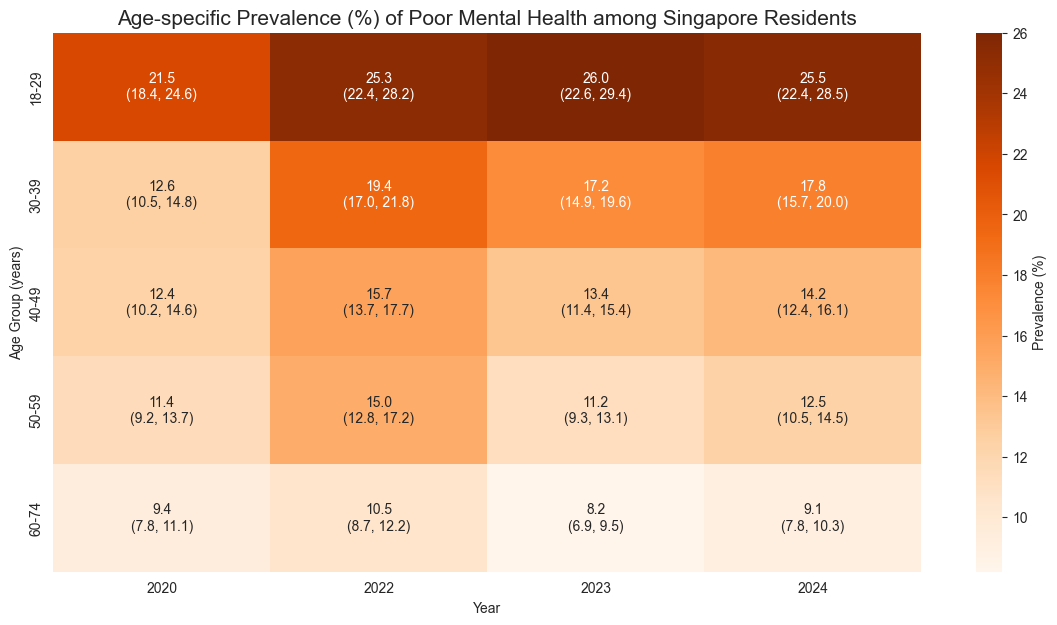

In [16]:
pivot_table = df.pivot(index='Age', columns='Year', values='Percentage')
annot_table = pivot_table.copy().astype(str)

for age in pivot_table.index:
    for year in pivot_table.columns:
        val = pivot_table.loc[age, year]
        low, high = ci_dict[(age, year)]
        annot_table.loc[age, year] = f"{val:.1f}\n({low:.1f}, {high:.1f})"

plt.figure(figsize=(14, 7))
sns.heatmap(
    pivot_table,
    annot=annot_table,
    fmt="",
    cmap='Oranges',
    cbar_kws={'label': 'Prevalence (%)'}
)
plt.title('Age-specific Prevalence (%) of Poor Mental Health among Singapore Residents', size=15)
plt.ylabel('Age Group (years)')
plt.xlabel('Year')
plt.show()



# Plot 2
### Prevalence by Gender over time

In [17]:
df1 = pd.read_csv('NPHS_statistics_by-gender_20-24.csv')
df1.head(10)

,Year,Age,Gender,Percentage
0,2020,18-29,Male,18.6
1,2020,30-39,Male,10.4
2,2020,40-49,Male,12.5
3,2020,50-59,Male,9.7
4,2020,60-74,Male,8.9
5,2020,18-29,Female,24.5
6,2020,30-39,Female,14.6
7,2020,40-49,Female,12.3
8,2020,50-59,Female,13.2
9,2020,60-74,Female,9.9


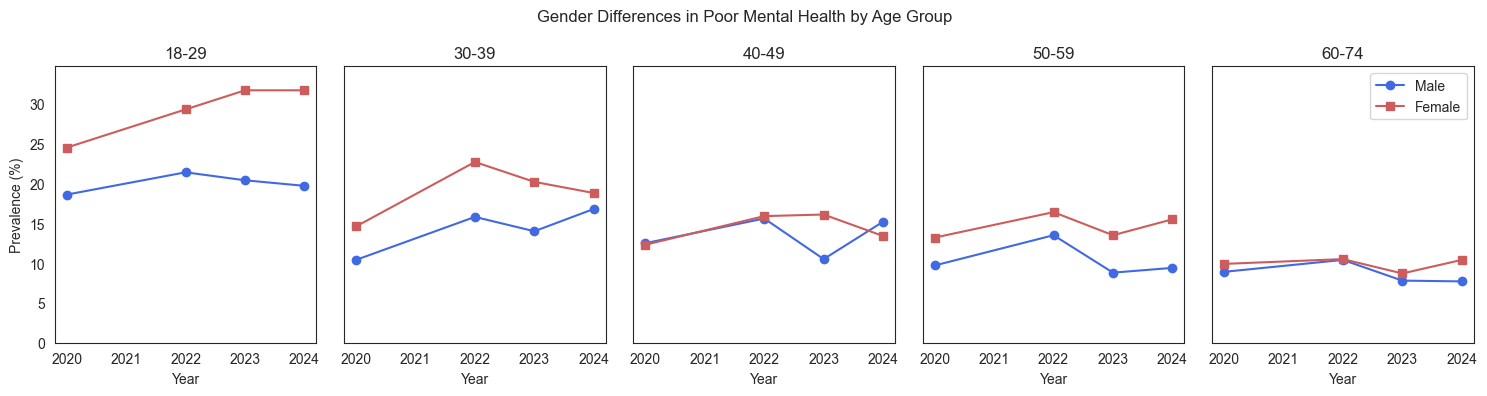

In [18]:
by_age = sorted(df1['Age'].unique())
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(by_age),
    figsize=(15, 4),
    sharey=True
)

for ax, age in zip(axes, by_age):
    subset = df1[df1['Age'] == age]

    # plot for male and female separately, using different markers for each gender
    male_data = subset[subset['Gender'] == 'Male']
    ax.plot(
        male_data['Year'],
        male_data['Percentage'],
        marker='o',
        label='Male',
        color='royalblue'
    )

    female_data = subset[subset['Gender'] == 'Female']
    ax.plot(
        female_data['Year'],
        female_data['Percentage'],
        marker='s',
        label='Female',
        color='indianred'
    )
    '''
    # plot total for the age group as a dashed line
    total_data = df[df['Age'] == age]
    ax.plot(
        total_data['Year'], 
        total_data['Percentage'],
        label='Total',
        color='grey',
        linestyle='--', 
        alpha=0.6
    )
    '''
    
    ax.set_title(age)
    ax.set_xlabel('Year')
    ax.grid(visible=False)
    
axes[0].set_ylabel('Prevalence (%)')
axes[-1].legend(loc='upper right')
plt.suptitle('Gender Differences in Poor Mental Health by Age Group')
plt.ylim(0, df1['Percentage'].max() + 3)
plt.tight_layout()
plt.show()


# Plot 3
### Preferred Sources of Help by Youths (most at risk group)

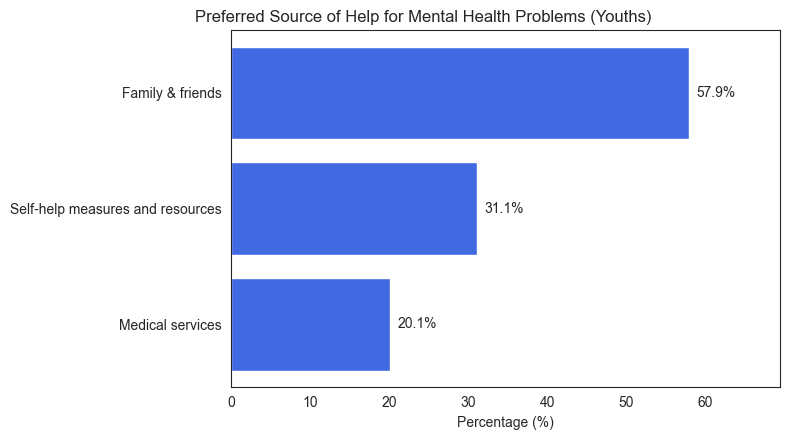

In [19]:
data = {
    "source": ["Family & friends", "Self-help measures and resources", "Medical services"],
    "percentage": [57.9, 31.1, 20.1]
}

df2 = pd.DataFrame(data)

# Sort descending
df2 = df2.sort_values('percentage', ascending=True)

plt.figure(figsize=(8, 4.5))
sns.set_style("white")
bars = plt.barh(df2['source'], df2['percentage'], color='royalblue')
plt.xlabel("Percentage (%)")
plt.title("Preferred Source of Help for Mental Health Problems (Youths)", position=(0.35, 1.03))

# Annotate values on bars
for bar in bars:
    w = bar.get_width()
    plt.text(w + 1, bar.get_y() + bar.get_height()/2, f"{w:.1f}%", va='center')

plt.xlim(0, max(df2['percentage']) * 1.2)
plt.tight_layout()
plt.show()
